# Case Study on Testing of Hypothesis

### Submitted by: *Ashmina T.*

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.  
* The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.  
* The company needs to check whether there is any dependency between the
features “Region” and “Manager”.  
Help the company to carry out their study with the help of data provided.

In [1]:
#importing libraries
import numpy as np
import scipy.stats as stat
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
sales_data = pd.read_csv('Sales_add.csv')

In [3]:
#displaying first 5 rows
sales_data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
#renaming the columns for easy access
sales_data.columns = ['Month','Region','Manager','sales_before','sales_after']

In [5]:
sales_data.head()

,Month,Region,Manager,sales_before,sales_after
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [6]:
#getting concise summary of the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         22 non-null     object
 1   Region        22 non-null     object
 2   Manager       22 non-null     object
 3   sales_before  22 non-null     int64 
 4   sales_after   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
#checking for null values
sales_data.isna().sum()

Month           0
Region          0
Manager         0
sales_before    0
sales_after     0
dtype: int64

In [8]:
#statistical summary of the dataset
sales_data.describe()

,sales_before,sales_after
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


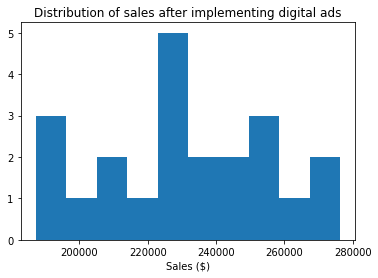

In [9]:
#histogram of sales data(after using digital ads)
plt.hist(sales_data['sales_after'])
plt.title("Distribution of sales after implementing digital ads")
plt.xlabel("Sales ($)")
plt.show()

The data seems to be normally distributed.

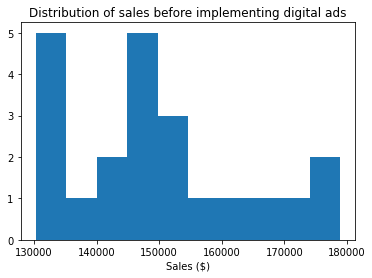

In [10]:
#histogram of sales data(before using digital ads)
plt.hist(sales_data['sales_before'])
plt.title("Distribution of sales before implementing digital ads")
plt.xlabel("Sales ($)")
plt.show()

The data does not seems to be normally distributed. But as we are limited to z-test, t-test & chi-squared test now , we can use one of them to test our hypotheses

## 1. clarify whether there is any increase in sales after stepping into digital marketing.

### 1.a. Develop a hypothesis

**Null Hypothesis, H<sub>0</sub>:** There is no increase in sales after stepping into digital marketing.  
**Alternate Hypothesis, H<sub>a</sub>:** There is an increase in sales after stepping into digital marketing.

### 1.b. Set Significance Level

In [11]:
#setting the significance level(alpha) to 0.05 or 5%
alpha = 0.05

### 1.c. Identify the Test Statistic

In [12]:
sales_data.shape[0]

22

As the size of the dataset is less than 30, we have to use t-statistic.  
Here, we have to compare two related groups of data(sales before digital marketing and sales after digital marketing). For that we use Paired sample t-test.

### 1.d. Determine the p-value 

In [13]:
a = sales_data['sales_before']
b = sales_data['sales_after']
t_score,p_value = stat.ttest_rel(b,a,alternative='greater')
print("t-score:%.3f"%t_score)
print("p-value:",p_value)

t-score:12.091
p-value: 3.168333502287889e-11


### 1.e. Comparing p-value and Significance level

In [14]:
if p_value < alpha:
  print("We reject null hypothesis")
else:
  print("We accept null hypothesis")

We reject null hypothesis


**There is significant evidence that the sales of the company increased after stepping into digital marketing.**

## 2. Check whether there is any dependency between the features “Region” and “Manager”.

### 2.a. Develop a hypothesis 

**Null Hypothesis, H<sub>0</sub>:** The features 'Region' and 'Manager' have no relationship.  
**Alternate Hypothesis, H<sub>a</sub>:** There is a relationship between the features 'Region' and 'Manager'.

### 2.b. Set a Significance Level

In [15]:
#setting significance level(alpha) to 0.05
alpha = 0.05

### 2.c. Identify Test statistic

Here we have to check if two categorical variables (Region & Manager) are related or not. So, we use chi-square Test of Independence.

### 2.d. Determine p-value

In [16]:
#constructing a contingency table
#Each cell in the table represents a mutually exclusive combination of Region-Manager values.
contingency_table = pd.crosstab(sales_data.Region,sales_data.Manager)
contingency_table

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [17]:
#calculating p-value using chi-square test
static,p,dof,expected_values = stat.chi2_contingency(contingency_table)
print("Chi-square: %.3f\np-value: %.3f\nDegree of freedom:%d"%(static,p,dof))

Chi-square: 3.051
p-value: 0.549
Degree of freedom:4


### 2.e. Compare p-value and Significance level

In [18]:
if p < alpha:
    print("We reject Null Hypothesis")
else:
    print("We accept Null Hypothesis")

We accept Null Hypothesis


**There is no significant relationship between the features 'Region' and 'Manager'.**